📘 **Note Format Guide**

This format serves as a structured guide for organizing lecture content, personal interpretation, experiments, and study-related questions.

| Type | What It Means | When I Use It |
|------|----------------|----------------|
| 📝 Lecture | Original material from the professor’s notes | When I’m referencing core concepts or provided code |
| 🗣️ In-Class Note | Verbal explanations shared during the lecture | When I want to record something the professor said in class but didn’t include in the official notes |
| ✍️ My Note | My thoughts, interpretations, or additional explanations | When I reflect on or explain something in my own words |
| 🔬 Experiment | Code I tried out or changed to explore further | When I test variations or go beyond the original example |
| ❓ Question | Questions I had while studying | When I want to revisit or research something more deeply |

📝
🗣️
✍️
🔬
❓

# 1. 강의노트 원본 및 영상 링크

[https://guebin.github.io/DL2025/posts/03wk-1.html](https://guebin.github.io/DL2025/posts/03wk-1.html)

# 2. Imports 📝

In [1]:
import torch
import matplotlib.pyplot as plt 

In [2]:
plt.rcParams['figure.figsize'] = (4.5, 3.0)

# 3. 파이토치식 코딩패턴 (2) 📝

*복습(잔소리)*

In [6]:
# 로드맵
# 회귀/로지스틱 -> DNN -> CNN 
# 파이토치식 코딩패턴: step1~4 
# step1: 도메인전문가,통계 step2 통계 step3 컴공 step4 산공
# 모델링(비통계): X--> y 가는 패턴을 찾는거다.. // 추세선찾는것 
# 관측자료 (x,y) -- with error 
# 추세선(underlying) --  (x,yhat=X@W) with out error 
# 모델링: 에러가포함된 자료에서 error-free 한 structure를 찾는것 
# 모델링의 철칙: error-free 한 structure를 찾으려고 노력해야지.. error를 따라가려고 노력하면 X 
# 오차: error-free한 스트럭쳐(모델)이랑 실제관측데이터의 갭이 있는데, 이 갭을 설명해주는 역할을 함 

- 🗣️
    - CNN: 이미지 자료 분석
    - $y \text{ (with error) } \approx X@W \text{ (error-free) }$
    - $y = X@W + \epsilon$

*데이터*

In [3]:
torch.manual_seed(43052)
x,_ = torch.randn(100).sort()
eps = torch.randn(100)*0.5
X = torch.stack([torch.ones(100),x],axis=1)
W = torch.tensor([[2.5],[4.0]])
y = X@W + eps.reshape(100,1)
x = X[:,[1]]

## A. bias의 사용 

🗣️(

- 저번 시간 코드

In [4]:
net = torch.nn.Linear(2, 1, bias=False)
net.weight.data = torch.tensor([[-5.0, 10.0]])
loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.SGD(net.parameters(), lr=0.1) # lr: learning rate

# step 1~4
for epoc in range(30):
    # 1
    yhat = net(X)
    # 2
    loss = loss_fn(yhat,y)
    # 3
    loss.backward()
    # 4
    optimizr.step()
    optimizr.zero_grad()

In [6]:
net.weight # 지난 시간 결과와 동일

Parameter containing:
tensor([[2.4290, 4.0144]], requires_grad=True)

> 이제 bias=True

In [7]:
# net(X) = X@net.weight.T # 현재 이렇게 알고 있으나 사실은 아님

In [8]:
net.weight

Parameter containing:
tensor([[2.4290, 4.0144]], requires_grad=True)

In [9]:
print(net.bias) # 현재는 bias=False

None


In [10]:
# net(X) = X@net.weight.T + net.bias # 사실은 이게 맞음

- 둘은 동일
    - y = X@W + ϵ # y = net(X) + ϵ
    - y = w0hat + x*w1hat + ϵ # y = net(x) + ϵ
- net(X) = X\@net.weight.T + net.bias 에서 X가 x로 바뀌면
    - net(x) = x\@net.weight.T + net.bias
    - net(x) = w0hat + x*w1hat 이므로
    - net.bias에 해당하는 것은 w0hat
    - net.weight.T에 해당하는 것은 w1hat 으로 생각 가능
- 위를 기반으로 net(x)를 만들면
    - x는 (n,1)이므로 input 차원은 1  

In [11]:
net = torch.nn.Linear(1,1,bias=True)
net

Linear(in_features=1, out_features=1, bias=True)

In [12]:
net.weight # 1x1 matrix

Parameter containing:
tensor([[0.3480]], requires_grad=True)

In [13]:
net.bias # length 1인 vector

Parameter containing:
tensor([0.7757], requires_grad=True)

In [14]:
net.weight.T # net(x) = x@net.weight.T + net.bias 에서 net.weight.T는 w1hat

tensor([[0.3480]], grad_fn=<PermuteBackward0>)

In [15]:
net.weight.data = torch.tensor([[10.0]])
net.weight.data

tensor([[10.]])

In [16]:
net.bias.data = torch.tensor([[-5.0]]) # net(x) = x@net.weight.T + net.bias 에서 net.bias는 w0hat
net.bias.data

tensor([[-5.]])

- 위의 내용을 저번 시간 코드에 반영하면
    - net 수정, weight 및 bias 값 수정
    - net(X) -> net(x)

In [17]:
net = torch.nn.Linear(1, 1, bias=True)
net.weight.data = torch.tensor([[10.0]])
net.bias.data = torch.tensor([[-5.0]])
loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.SGD(net.parameters(), lr=0.1) # lr: learning rate

# step 1~4
for epoc in range(30):
    # 1
    yhat = net(x)
    # 2
    loss = loss_fn(yhat,y)
    # 3
    loss.backward()
    # 4
    optimizr.step()
    optimizr.zero_grad()

In [18]:
net.weight

Parameter containing:
tensor([[4.0144]], requires_grad=True)

In [19]:
net.bias

Parameter containing:
tensor([[2.4290]], requires_grad=True)

- 저번 시간 결과와 동일

)🗣️

*net에서 bias를 사용*

In [20]:
# step1을 위한 사전준비
net = torch.nn.Linear(
    in_features=1,
    out_features=1,
    bias=True
) # net(x) = x@net.weight.T + net.bias 
net.bias.data = torch.tensor([-5.0])
net.weight.data = torch.tensor([[10.0]])
# step2를 위한 사전준비
loss_fn = torch.nn.MSELoss()
# step4를 위한 사전준비 
optimizr = torch.optim.SGD(net.parameters(),lr=0.1)
for epoc in range(30):
    # step1: yhat 
    yhat = net(x)
    # step2: loss
    loss = loss_fn(yhat,y)
    # step3: 미분
    loss.backward()
    # step4: update
    optimizr.step()
    optimizr.zero_grad()

In [21]:
net.bias.data, net.weight.data

(tensor([2.4290]), tensor([[4.0144]]))

`#`

## B. 잘못된(?) 코드

🗣️ bias의 default는 True이므로 저번 시간 코드에서 bias를 지우면 bias=True가 됨

In [51]:
# step1을 위한 사전준비
net = torch.nn.Linear(
    in_features=2,
    out_features=1,
)
net.weight.data = torch.tensor([[-5.0,  10.0]])
# step2를 위한 사전준비
loss_fn = torch.nn.MSELoss()
# step4를 위한 사전준비 
optimizr = torch.optim.SGD(net.parameters(),lr=0.1)
for epoc in range(30):
    # step1: yhat 
    yhat = net(X)
    # step2: loss
    loss = loss_fn(yhat,y)
    # step3: 미분
    loss.backward()
    # step4: update
    optimizr.step()
    optimizr.zero_grad()

🗣️(

In [52]:
net.weight # 결과가 많이 달라짐

Parameter containing:
tensor([[-1.1114,  4.0080]], requires_grad=True)

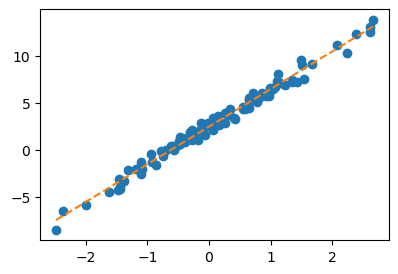

In [53]:
plt.plot(x,y,'o')
plt.plot(x,net(X).data, '--')

- 그런데 결과를 시각화해보면 나쁘지 않음

)🗣️

`-` 결과시각화 

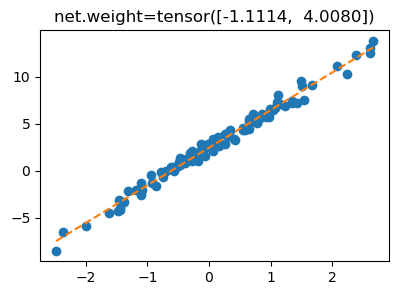

In [54]:
plt.plot(x,y,'o')
plt.plot(x,yhat.data,'--')
plt.title(f'net.weight={net.weight.data.reshape(-1)}');

`-` 나쁘지 않은 이유? 

✍️ 바로 밑의 코드는 편의상  실행 X

```python
# step1을 위한 사전준비
net = torch.nn.Linear(
    in_features=2,
    out_features=1,
)
yhat = net(X) = X@net.weight.T + net.bias
```

In [55]:
net.weight

Parameter containing:
tensor([[-1.1114,  4.0080]], requires_grad=True)

In [56]:
net.bias

Parameter containing:
tensor([3.5562], requires_grad=True)

🗣️(

- 원래대로라면 절편, 기울기 총 2개의 parameter만 학습해야하는데 위의 결과는 3개를 학습함
- yhat 계산 과정을 살펴보면

In [59]:
X[[0],:] # nx2 martix에서 첫 번째 observation만 뽑음

tensor([[ 1.0000, -2.4821]])

In [60]:
yhat[:1] # 이 yhat이 어떻게 나왔는지 보면

tensor([[-7.5063]], grad_fn=<SliceBackward0>)

- X[[0],:] @ net.weight.T + net.bias

In [61]:
-1.1114 * 1.0000 + 4.0080 * (-2.4821) + 3.5562 # 약간의 차이는 소수점 차이

-7.503456799999999

- -2.4821은 x, 다음과 같이 정리하면

In [62]:
-1.1114 * 1.0000 + 3.5562

2.4448

- 절편에 대한 True 값: 2.5, 기울기에 대한 True 값: 4
    - 즉, 절편을 2개로 나눠서 학습함 (비효율적)
- 그러면 이게 틀린 것인가?
    - 회귀분석에서 이렇게 모델링하면 틀림 (통계학적 관점)
    - 하지만 학습 결과 자체는 맞음 (비효율적일뿐)
    - AI나 DL 관점에서는 최적의 parameter 개수가 정해지지 않은 경우가 많아서
    - 비효율적이긴해도 잘못으로 까지는 생각 X

)🗣️

# 4. 로지스틱 모형 📝

## A. $\hat{\bf y} = ??$

🗣️(

- 일반적으로 회귀분석에서 설명 변수, 반응 변수 모두 연속형 변수이지만,
- y가 상태를 의미할 때가 있음 (ex. X = 점수, y = 합격/불합격)
    - 합격을 1, 불합격을 0으로 숫자화하면
    - y는 0 또는 1만 가짐
- 이러한 자료는 매우 많음 

)🗣️

`-` ${\bf X}$를 가지고 ${\bf y}$를 맞추는 아래와 같은 문제

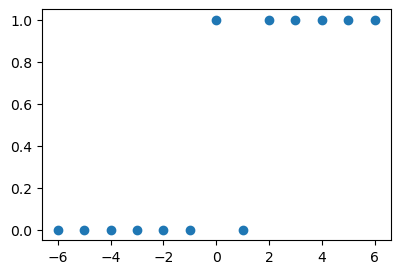

In [63]:
x = torch.tensor([-6,-5,-4,-3,-2,-1, 0, 1, 2, 3, 4, 5, 6.0]).reshape(-1,1)
y = torch.tensor([ 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1]).reshape(-1,1)
plt.plot(x,y,'o')

🗣️(

- x가 증가함에 따라 y가 1이 될 것 같고, x가 감소함에 따라 y가 0될 것 같음
- 모델링을 어떻게?
- 모델링: observed data를 보고 error-free한 structure를 찾는 것
- 여기서 error-free한 structure는?
    - error-free: 운적인 요소가 없음
- 운적인 요소?
    - 이 경우 0점인데 합격, 1점인데 불합격
    - 도저히 받아들이지 못할 수 있음
    - (이렇게 경계에 있는데 운적인 요소로 결정되는 경우)
- 이것을 일반적인 회귀분석처럼 underlying(error-free)이 있고 오차항을 정규분포에서 error를 뽑은 것으로 설명하면 X
    - 이전의 cafe 데이터는 이렇게 설명 가능
- 차라리 underlying에서 x값에 대응하는 y값을 성공 확률로 하는 베르누이 시행으로 설명하면 그럴듯 함
    - underlying: 여기서는 관측값이 아니고 확률을 의미하는 곡선으로 해석
    - 성공 확률이 0.9인 베르누이 시행을 했는데 0.1인 확률의 결과가 나와도 어쩔 수 없음 (운적인 요소)
    - 오차: 베르누이 시행에 의해 생성되는 랜덤성
- 통계학과식 모델링
    - structure(error-free)뿐만 아니라 (이것도 어려움, 여기까지는 비통계학과식)
    - 관측치를 error term을 이용해 설명 (운적인 요소가 어떻게 작용하는지)

- yhat
    - underlying
    - y가 0 또는 1만 가지므로 yhat도 그래야하나 싶지만 X (회귀분석에서 오차항이 포함된 관측치를 따라가는 것과 동일)
    - yhat은 0과 1사이의 숫자 (모델링 대상: 관측치가 아니라 추세선)\
- 다음과 같이 모델링을 해보면 

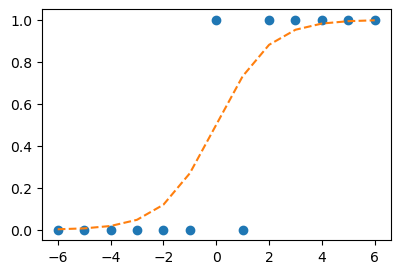

In [65]:
prob = torch.exp(x) / (torch.exp(x) + 1)
plt.plot(x,y,'o')
plt.plot(x,prob,'--')

- $\frac{e^x}{e^x + 1}$
    - $x$가 커지면 1에 가까워지고
    - $x=0$이면 1/2
    - $x$가 작아지면 0에 가까워짐
- 하지만 이 수식은 이 경우에만 맞고 확장성이 떨어짐 

)🗣️

`-` 아래와 같이 모형화 하면? 

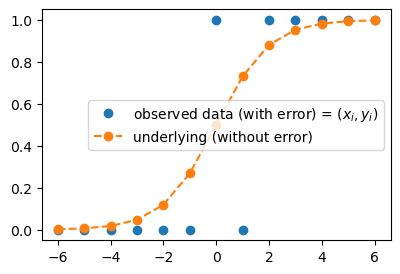

In [66]:
plt.plot(x,y,'o', label=r"observed data (with error) = $(x_i,y_i)$")
plt.plot(x,torch.exp(x)/(1+torch.exp(x)),'o--', label = "underlying (without error)")
plt.legend()

## B. $\hat{\bf y} = \frac{\exp(\text{linr}({\bf X}))}{1+\exp(\text{linr}({\bf X}))}$

`-` 걱정: 산점도가 꼭 아래와 같은 방식이 아니라면 어쩌지? 

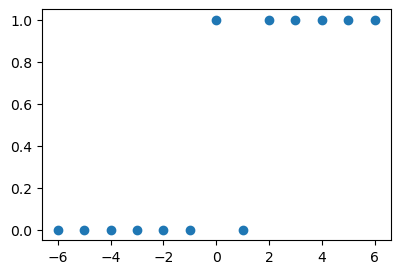

In [67]:
plt.plot(x,y,'o')

- $x$가 증가할수록 $y$가 0이 된다면? 
- 0근처에서 변화가 일어나지 않고 2근처에서 변화가 일어난다면? 
- 변화가 좀 더 급하게 (혹은 완만하게 일어난다면?) 

🗣️(

- $\frac{e^{-x}}{e^{-x} + 1}$
- 합격률이 낮은 경우
- strict하게 결과가 나뉘는 경우(ex. 장학금)

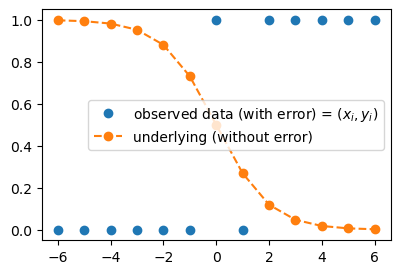

In [68]:
plt.plot(x,y,'o', label=r"observed data (with error) = $(x_i,y_i)$")
plt.plot(x,torch.exp(-x)/(1+torch.exp(-x)),'o--', label = "underlying (without error)")
plt.legend()

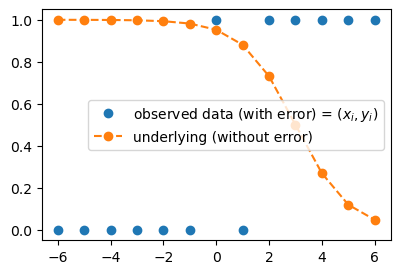

In [69]:
plt.plot(x,y,'o', label=r"observed data (with error) = $(x_i,y_i)$")
plt.plot(x,torch.exp(-x+3)/(1+torch.exp(-x+3)),'o--', label = "underlying (without error)")
plt.legend()

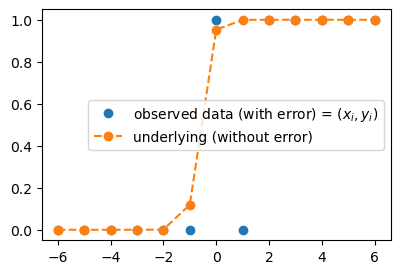

In [74]:
plt.plot(x,y,'o', label=r"observed data (with error) = $(x_i,y_i)$")
plt.plot(x,torch.exp(5*x+3)/(1+torch.exp(5*x+3)),'o--', label = "underlying (without error)")
plt.legend()

- 이러한 5*x+3 등을 일반화하면
    - 5*x+3 = w0hat + w1hat * x : 회귀분석 선형 모형
    - = w0hat + w1hat * x = linr(x) # x를 linear transform시킴

🔬 0근처에서 변화가 일어나지 않고 2근처에서 변화가 일어난다면?

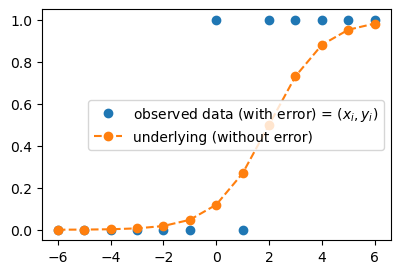

In [71]:
plt.plot(x,y,'o', label=r"observed data (with error) = $(x_i,y_i)$")
plt.plot(x,torch.exp(x-2)/(1+torch.exp(x-2)),'o--', label = "underlying (without error)")
plt.legend()

🔬 변화가 좀 더 급하게 일어난다면?

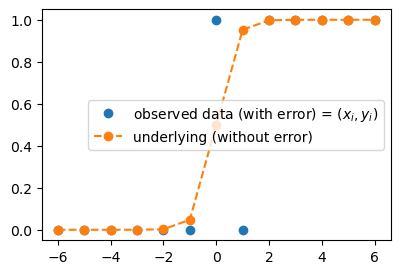

In [72]:
plt.plot(x,y,'o', label=r"observed data (with error) = $(x_i,y_i)$")
plt.plot(x,torch.exp(3*x)/(1+torch.exp(3*x)),'o--', label = "underlying (without error)")
plt.legend()

🔬 변화가 좀 더 완만하게 일어난다면?

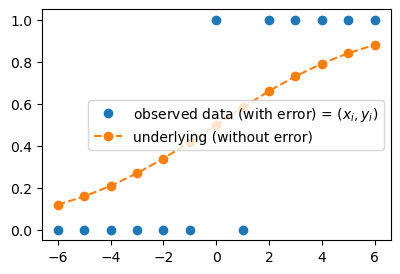

In [73]:
plt.plot(x,y,'o', label=r"observed data (with error) = $(x_i,y_i)$")
plt.plot(x,torch.exp(x/3)/(1+torch.exp(x/3)),'o--', label = "underlying (without error)")
plt.legend()

)🗣️

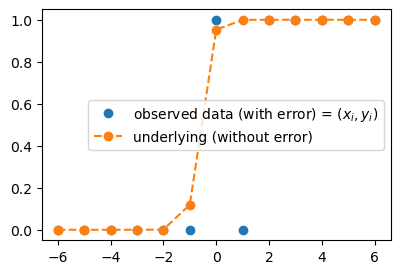

In [75]:
plt.plot(x,y,'o', label=r"observed data (with error) = $(x_i,y_i)$")
plt.plot(x,torch.exp(5*x+3)/(1+torch.exp(5*x+3)),'o--', label = "underlying (without error)")
plt.legend()

`-` 걱정해결 

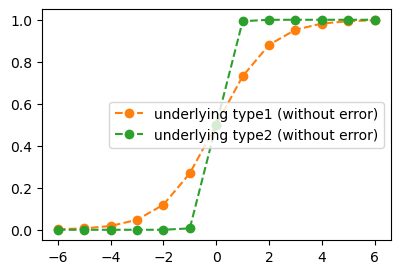

In [76]:
#plt.plot(x,y,'o', label=r"observed data (with error) = $(x_i,y_i)$")
plt.plot(x,torch.exp(x)/(1+torch.exp(x)),'o--', label = "underlying type1 (without error)", color="C1")
plt.plot(x,torch.exp(5*x)/(1+torch.exp(5*x)),'o--', label = "underlying type2 (without error)", color="C2")
plt.legend()

:::{.callout-note} 

**회귀 vs 로지스틱**

- ${\bf X} \to {\bf y}$ 에 대한 패턴이 $\text{linr}({\bf X}) \approx {\bf y}$ 이라면 회귀!
- ${\bf X} \to {\bf y}$ 에 대한 패턴이 $\frac{\exp(\text{linr}({\bf X}))}{1+\exp(\text{linr}({\bf X}))} \approx {\bf y}$ 이라면 로지스틱!
:::

🗣️(

- X를 linear transform했더니 선 자체가 y와 비슷 => 회귀
- 위의 그래프를 그리는 식으로 했더니 y와 비슷 => 로지스틱
    - 정확히는 확률이 y와 비슷하다면 (y 자체는 0 또는 1) 

)🗣️

## C. 로지스틱 모형

`-` $x$가 커질수록 (혹은 작아질수록) $y=1$이 잘나오는 모형은 아래와 같이 설계할 수 있음
\<— 외우세요!!!

-   $y_i \sim {\cal B}(\pi_i),\quad$ where
    $\pi_i = \frac{\exp(w_0+w_1x_i)}{1+\exp(w_0+w_1x_i)} = \frac{1}{1+\exp(-w_0-w_1x_i)}$

-   $\hat{y}_i= \frac{\exp(\hat{w}_0+\hat{w}_1x_i)}{1+\exp(\hat{w}_0+\hat{w}_1x_i)}=\frac{1}{1+\exp(-\hat{w}_0-\hat{w}_1x_i)}$

- 🗣️
    - $\pi_i$는 확률을 의미
    - $\frac{e^{x}}{1 + e^{x}}$ = $\frac{1}{e^{-x} + 1}$ 에서 $x$ 대신 $w_0+w_1x_i$
    - 책 마다 다르지만 오른쪽처럼 많이 씀

`-` 회귀모형과 로지스틱 모형의 비교 

- 회귀모형: $y_i \sim {\cal N}(w_0+w_1x_i, \sigma^2)$^[원래는 이렇게 썼었지.. $y_i = w_0 + w_1x_i + \epsilon_i \quad \epsilon_i \sim {\cal N}(0,\sigma^2)$]
- 로지스틱: $y_i \sim {\cal B}\big(\frac{\exp(w_0+w_1x_i)}{1+\exp(w_0+w_1x_i)}\big)$

- 🗣️
    - 회귀모형: 오차항의 관점에서 해석
    - 로지스틱(y가 0 또는 1): 위의 곡선을 나타내는 일반적인 수식
        - => 이 수식값을 토대로 베르누이 시행을 하면 오차항까지 설명 가능한 모델이 됨

`-` 우리가 예측하고 싶은것 

- 회귀모형: 정규분포의 평균을 예측하고 싶음. 즉 $w_0+w_1x_i$를 예측하고 싶음. 예측값으로는 $\hat{w}_0 + \hat{w}_1x_i$를 사용!
- 로지스틱: 베르누이의 평균을 예측하고 싶음. 즉 $\frac{\exp(w_0+w_1x_i)}{1+\exp(w_0+w_1x_i)}$를 예측하고 싶음. 예측값으로는 $\frac{\exp(\hat{w}_0+\hat{w}_1x_i)}{1+\exp(\hat{w}_0+\hat{w}_1x_i)}$를 사용!

- 🗣️
    - 둘 다 $\hat{w}_0$, $\hat{w}_1$를 추정하면 각각 직선과 곡선이 결정됨
    - 베르누이의 평균은 $p$
        - 즉, 확률을 예측하고 싶음 